Initialization time: 0.026681900024414062


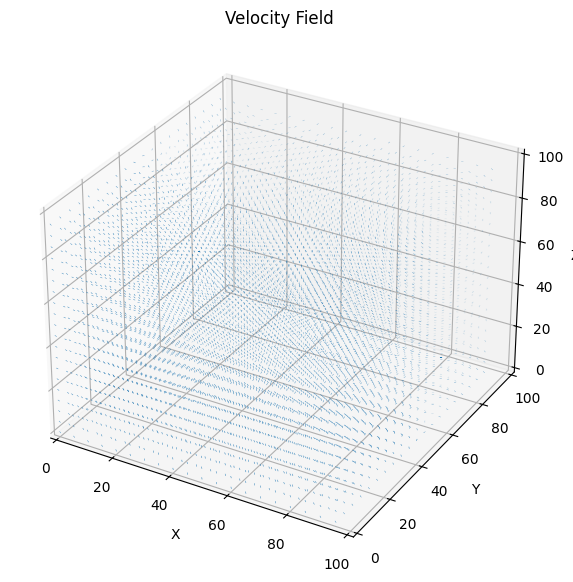

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

# Constants
dt = 0.01  # Time step
densityWater = 1000.0
viscosity = 0.1

# Function to initialize velocity fields
def initialize_velocity_fields(nx, ny, nz):
    x = np.arange(0, nx) / nx
    y = np.arange(0, ny) / ny
    z = np.arange(0, nz) / nz

    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

    velocity_field_x = np.sin(densityWater * dt * viscosity * np.pi * X)
    velocity_field_y = np.cos(densityWater * dt * viscosity * np.pi * Y)
    velocity_field_z = np.sin(densityWater * dt * viscosity * np.pi * Z)

    return velocity_field_x, velocity_field_y, velocity_field_z

if __name__ == "__main__":
    # Size of the simulation grid
    nx = 1000
    ny = 1000
    nz = 1000

    # Initialize velocity fields
    start_time = time.time()
    velocity_field_x, velocity_field_y, velocity_field_z = initialize_velocity_fields(nx, ny, nz)
    print("Initialization time:", time.time() - start_time)

    # Create meshgrid
    x = np.arange(0, nx)
    y = np.arange(0, ny)
    z = np.arange(0, nz)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

    # Create quiver plot for velocity vector field
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    stride = 5  # Adjust the stride to control density of arrows
    ax.quiver(X[::stride, ::stride, ::stride], 
              Y[::stride, ::stride, ::stride], 
              Z[::stride, ::stride, ::stride], 
              velocity_field_x[::stride, ::stride, ::stride], 
              velocity_field_y[::stride, ::stride, ::stride], 
              velocity_field_z[::stride, ::stride, ::stride], 
              length=0.1, normalize=True)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(0, nx)
    ax.set_ylim(0, ny)
    ax.set_zlim(0, nz)
    ax.set_title('Velocity Field')
    plt.show()